# Report: Asteroids EDA

## 1. Introduction

The Solar System has been filled with millions of minor bodies of different sizes and compositions since its early days. After millions of years of evolution, the Solar System has reached an apparent *equilibrium*-like state, where there are no big sudden changes in the distribution of planets and larger bodies. However, smaller bodies are specially vulnerable to orbital perturbations exherted by planets or even nearby stars that pass close to the Oorb's Clud outernmost layers.
![asteroides](../img/main_belt.jpg)
 This perturbations change the orbital parameters and can make asteroids and comets collide with planets. Such collisions between a minor body and Earth, have in many cases proved to be catastrophical for life on Earth and pose a great danger for the well being of humankind.

 Understanding the main characteristics of Solar System's minor bodies can lead us to a better understanding of Earth's future *not so lovely* neighbours.
 
 This *Exploratory Data Analysis* analyzes a dataset containg information on more than $10^5$ asteroids in the Solar System. Let's delve into it!

## 2. General overview:

### 2.1 Contents:

The dataset analyzed in this *EDA*, a reduced version of a bigger dataset (the original dataset can be accessed [here](https://www.kaggle.com/datasets/adilshamim8/asteroid-dataset)), contains the following information for a large set of asteroids from different regions of the Solar System:
- Name and unique identifier.
- Class: a classifying variable, this parameter specifies the group to which the asteroid belongs.
- Diameter: given in $km$.
- Orbital parameters:
  - Semi-major axis: $a$, given in $AU$ ($1\,AU \approx 1.49\times 10^6 \,km$).
  - Eccentricity: $e$, a parameter related to the non-circularity of an orbit.
  - Perihelion and Aphelion distance: $q$ and $a_d$, closest and farest distance to the Sun in the orbit, respectively.
  - Inclination: $i$, given in $^\circ$, the angle between the orbital and the ecliptic plane.
  - Orbital period: given in years or days, time taken by the asteroid to orbit the sun.
  - And many more!
- Brightness parameters:
  - Absolute magnitude: $H$ (differs from the definition of absolute magnitude for stars), related to the total brightness of a non-star body.
  - Albedo: related to the reflectance of the body.
- **pha:** a boolean, perhaps one of the most interesting parameters, True if the asteroids could impact Earth, False if otherwise.

### 2.2 Understanding the dataset:

The dataset has already been cleaned, so we do not have to worry about missing values. Let's import the necessary libraries and check what the general characteristics of the dataset are:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/clean_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126131 entries, 0 to 126130
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           126131 non-null  int64  
 1   full_name       126131 non-null  object 
 2   pha             126131 non-null  bool   
 3   H               126131 non-null  float64
 4   diameter        126128 non-null  float64
 5   albedo          126131 non-null  float64
 6   diameter_sigma  126035 non-null  float64
 7   e               126131 non-null  float64
 8   a               126131 non-null  float64
 9   q               126131 non-null  float64
 10  i               126131 non-null  float64
 11  ad              126131 non-null  float64
 12  per             126131 non-null  float64
 13  per_y           126131 non-null  float64
 14  class           126131 non-null  object 
dtypes: bool(1), float64(11), int64(1), object(2)
memory usage: 13.6+ MB


The dataset contains information about 126131 asteroids.

**First of all:**

Let's have a look at the first 10 elements of the dataset and their sizes:

In [4]:
df[["full_name", "diameter"]].head(10)

,full_name,diameter
0,' 1 Ceres',939.400
1,' 2 Pallas',545.000
2,' 3 Juno',246.596
3,' 4 Vesta',525.400
4,' 5 Astraea',106.699
5,' 6 Hebe',185.180
6,' 7 Iris',199.830
7,' 8 Flora',147.491
8,' 9 Metis',190.000
9,' 10 Hygiea',407.120


These are really **huge** asteroids!

The first asteroid of the dataset, **Ceres**, is so big that it is no longer considered an asteroid. In fact, the **International Astronomical Unit** considers it a *dwarf planet*. Thanks to the gravity generated by its big mass, it reached *hydrostatic equilibrium*, i.e. its gravity was strong enough to make it round-shaped.

Keeping Ceres in the dataset is no big deal, as we are not working with mass values.

Let's now check what the different classes stored in the class column are:

In [5]:
df["class"].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

What do these 3 character long strings mean?
- **ATE:** *Atena* class asteroids, those that cross Earth's orbit but have a perihelion distance $q < 1\,AU$ and its aphelion distance is larger than Earth's.
- **APO:** *Apollo* class asteroids. Their semi-major axis is larger than Earth's, but their perihelion distance $q$ falls bellow Earth's aphelion distance, so they cross Earth's orbit. The meteorite of Chelyabinsk, the one that disintegrated in the atmosphere before hitting the ground in Russia in 2013 and injured more than 1500 people, belonged to this class.
- **AMO:** *Amor* class asteroids, those with perihelium distances $d_a$ larger than Earth's aphelion distance, and distance $q$ smaller than the semi-major axis of Mars. They do not cross Earth's orbit.
- **IMB, MBA, OMB:** *Inner Main Belt*, *Main Belt Asteroid* and *Outer Main Belt*, respectively. Three divisions used to classify asteroids from the Main Belt located between Mars and Jupiter.
- **TJN:** TJN class includes *Trojans* and *Greeks*, two groups of asteroids located in Jupiter's L4 and L5 Lagrange points.
- **CEN:** *Centaur* class asteroids. Centaurs have orbits that range from Jupiter's to Neptune's orbit. Their proximity to the gas giants makes their orbit unstable and are not long-lived.
- **MCA:** *Mars Crossing Asteroid*, asteroids that cross the orbit of Mars.
- **TNO:** *Trans-Neptunian Object*, those objects from the Kuiper Belt or Scattered Disk that have a semi-major axis larger than Neptune's.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2.1 Class:

Let's now check how many asteroids of each class are included in the dataset:

In [7]:
df["class"].value_counts()

class
MBA    116129
OMB      6871
TJN      1831
IMB       445
APO       291
MCA       264
AMO       190
ATE        69
CEN        29
TNO         7
AST         5
Name: count, dtype: int64

In [8]:
n = 3
labels = [name for name in df["class"].value_counts().index[0:n]]
m = len(df["class"].value_counts().index) - n
labels.extend(["" for i in range(m)])
labels

['MBA', 'OMB', 'TJN', '', '', '', '', '', '', '', '']

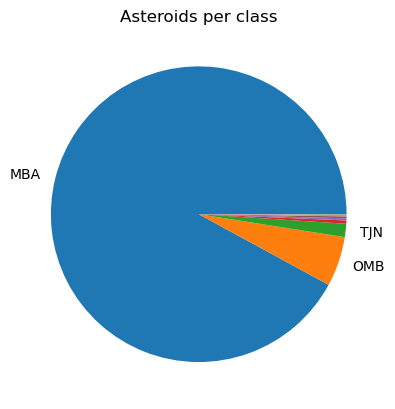

In [9]:
plt.figure()
plt.pie(df["class"].value_counts(), labels = labels)
plt.title("Asteroids per class")
plt.show()

An overwhelming majority of the asteroids contained in the dataset belong to the **Main Belt**!

### 2.2.2 Semi-major axis:

Futhermore, we would like to get more information on the orbits of the asteroids. Let's see what is the semi-major axis values are distributed.

In [10]:
df["a"].describe()

count    126131.000000
mean          2.817265
std           0.978965
min           0.626210
25%           2.547302
50%           2.754816
75%           3.094052
max         281.174710
Name: a, dtype: float64

**Wathc out!** See the max? What kind of asteroid can have such a large orbit? It must be very far away from the Sun.

In [11]:
furthest = df["a"].idxmax()

In [12]:
df.loc[furthest]

spkid                         2336756
full_name         '336756 (2010 NV1)'
pha                             False
H                                10.6
diameter                         44.2
albedo                          0.057
diameter_sigma                    8.0
e                            0.966553
a                           281.17471
q                            9.404548
i                          140.730831
ad                         552.944872
per                    1722117.618033
per_y                     4714.901076
class                             TNO
Name: 111125, dtype: object

Clearly, it is a TNO. However, its eccentricity is shocking: it is larger than 0.95! It has a perihelion of $9.4\,AU$, slightly closer than Saturn.

In [13]:
df[["class", "a"]].groupby("class").describe()

a                                                         \
          count       mean        std        min        25%        50%   
class                                                                    
AMO       190.0   2.082888   0.522081   1.108795   1.707231   2.041034   
APO       291.0   1.677679   0.506152   1.001140   1.272668   1.536091   
AST         5.0   4.984925   0.289215   4.626615   4.764124   5.025424   
ATE        69.0   0.871414   0.082997   0.626210   0.823108   0.883148   
CEN        29.0  15.743454   6.303722   5.736009  10.916268  14.660188   
IMB       445.0   1.919421   0.038877   1.803392   1.898552   1.927267   
MBA    116129.0   2.749296   0.304202   2.045049   2.536032   2.728074   
MCA       264.0   2.367586   0.276940   1.390389   2.278369   2.334957   
OMB      6871.0   3.357371   0.260987   3.200003   3.212027   3.228514   
TJN      1831.0   5.211035   0.054149   5.056222   5.172316   5.210904   
TNO         7.0  79.546124  89.566699  35.460437  38.702794  42.718080   

                              
             75%         max  
class                         
AMO     2.349648    4.260620  
APO     2.004055    3.286633  
AST     5.180916    5.327547  
ATE     0.928587    0.997697  
CEN    20.044882   30.018098  
IMB     1.946602    1.999826  
MBA     3.060301    3.199998  
MCA     2.570092    3.153853  
OMB     3.376295    4.272881  
TJN     5.247864    5.378759  
TNO    60.032025  281.174710

As we can see, different families have very different ranges of the semi-major axis. We should then plot their distributions by classes with similar semi-major axes:

In [14]:
mask_1 = (df["class"] == "AMO") | (df["class"] == "APO") | (df["class"] == "ATE") # Mask for asteroids with a ~ 1 AU
mask_2 = (df["class"] == "IMB") | (df["class"] == "MBA") | (df["class"] == "OMB") # Mask for Main Belt

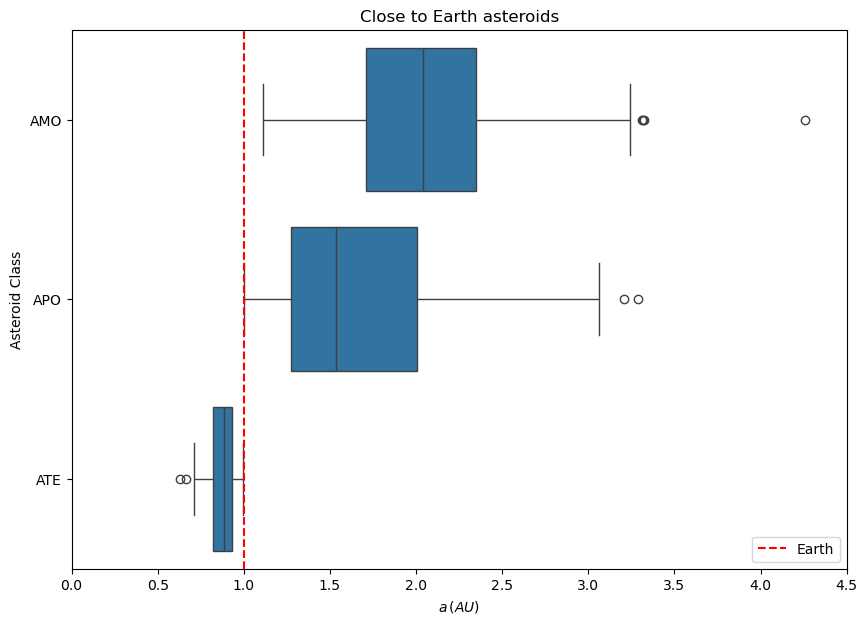

In [15]:
plt.figure(figsize = (10, 7))
sns.boxplot(data = df[["class", "a"]][mask_1], x = "a", y = "class")
plt.xlim(0, 4.5)
plt.axvline(x = 1, color = 'r', linestyle = "--", label = "Earth")
plt.xlabel(r"$a\,(AU)$")
plt.ylabel("Asteroid Class")
plt.title("Close to Earth asteroids")
plt.legend(loc = "lower right")
plt.show()

The semi-major axis values' distribution in the main belt is divided in different rings. *Outer Belt* asteroids seem to be more evenly distributed, while *Inner Belt* asteroids are more tightly packed.

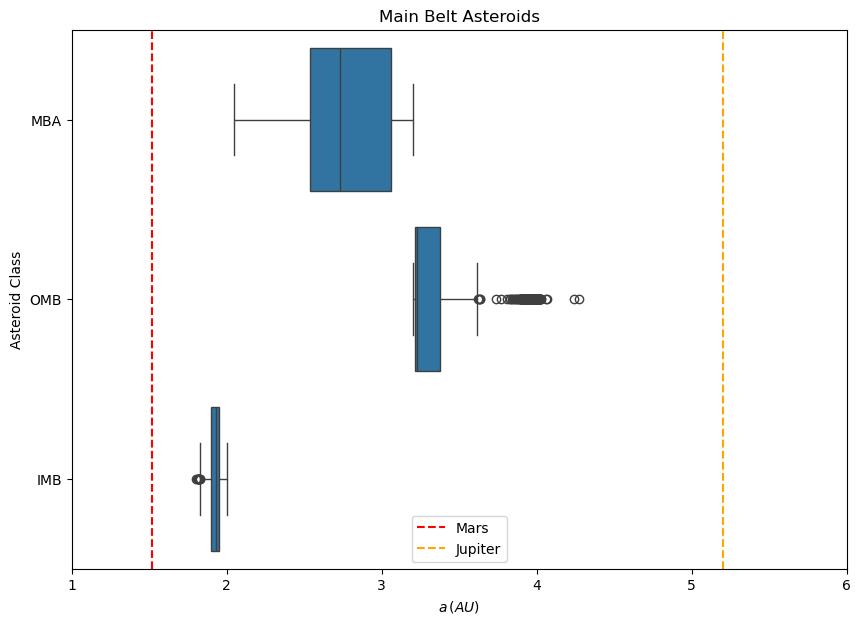

In [16]:
plt.figure(figsize = (10, 7))
sns.boxplot(data = df[["class", "a"]][mask_2], x = "a", y = "class")
plt.xlim(1, 6)
plt.axvline(x = 1.52, color = 'r', linestyle = "--", label = "Mars")
plt.axvline(x = 5.2, color = 'orange', linestyle = "--", label = "Jupiter")
plt.xlabel(r"$a\,(AU)$")
plt.ylabel("Asteroid Class")
plt.title("Main Belt Asteroids")
plt.legend(loc = "lower center")
plt.show()

Trojans and Greeks are located in the vicinity of Sun-Jupiter Lagrange's points. Their $a$ take values in a very narrow gap.

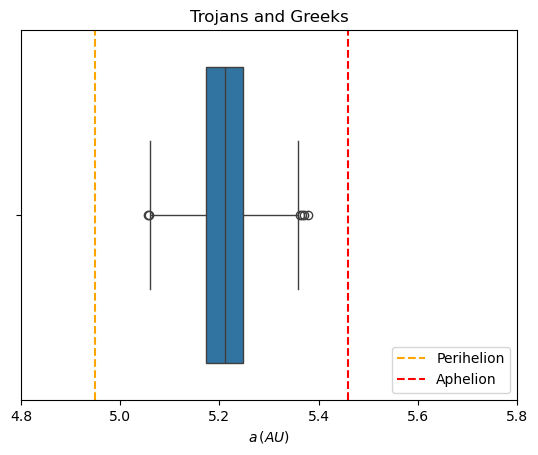

In [17]:
#plt.figure(figsize = (8,6))
sns.boxplot(data = df[df["class"] == "TJN"][["a"]], x = "a")
plt.xlabel(r"$a\,(AU)$")
plt.title("Trojans and Greeks")
plt.xlim(4.8, 5.8)
plt.axvline(x = 4.95, color = 'orange', linestyle = "--", label = "Perihelion")
plt.axvline(x = 5.46, color = 'red', linestyle = "--", label = "Aphelion")
plt.legend(loc ="lower right")
plt.show()

And lastly, let's have a look at Centaurs, asteroids in orbits between Jupiter and Neptune.

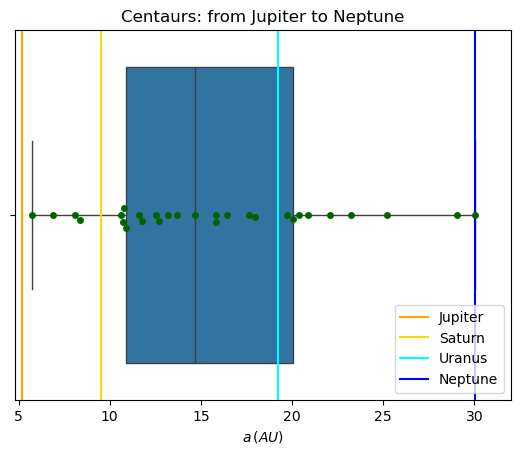

In [18]:
sns.boxplot(data = df[df["class"] == "CEN"][["a"]], x = "a")
sns.swarmplot(data = df[df["class"] == "CEN"][["a"]], x = "a", color = "#006400")
plt.xlabel(r"$a\,(AU)$")
plt.title("Centaurs: from Jupiter to Neptune")
plt.axvline(x = 5.2, color = "orange", label = "Jupiter")
plt.axvline(x = 9.54, color = "#FFD700", label = "Saturn")
plt.axvline(x = 19.22, color = "#00FFFF", label = "Uranus")
plt.axvline(x = 30.06, color = "#0000FF", label = "Neptune")
plt.xlim(4.8, 32)
plt.legend(loc ="lower right")
plt.show()

We are not going to plot the semi-major axis of *Trans-Neptunian Objects*, as their number is very low and no insight can be obtained from such a small set of information.

## 3. Hypotheses and questions:

After this quick look on the dataset, we can think of some questions we would like to answer and some hypotheses we would like to test.

- **Size related q&h:**
    1. Is there a relation between the asteroid class and size? Is there a $a$ value where asteroid size has a peak?
    2. Is there a relation between eccentricity $e$ and size?
- **Orbit related q&h:**
    1. Do larger semi-major axis values imply a larger eccentricity?
    2. In the *Main Belt*, there should be some $a$ ranges with no asteroids there. These ranges are called the *Kirkwood gaps*.
- **Brightness related q&h:**
    1. Asteroids far away from the Sun have larger albedo values. (They are less exposed to solar radiation and are able to keep their ice.)
    2. Asteroids coming out of the ecliptic plane have larger albedo values. (Do these asteroids come from the Oorb's cloud / Kuiper belt?)
    3. Is there a relation between brightness (albedo and absolute magnitude) and size? (Smaller asteroids might be a product of collisions)
- **Risk:**
    1. Asteroids classified as dangerous belong mostly to categories close to Earth (Apollo, Atena and Amor asteroids).

### 3.1 Size:

#### Q1:
Previously, we have seen that there is an object that can not be considered an asteroid. Ceres and Varuna, the two biggest objects, are considered small planets (Ceres is already considered one while Varuna might become one in the future). Therefore, if we would like to study the size distribution of asteroids, Ceres and Varuna would be outliers and should be discarded.

In [19]:
df_sizes = df[["full_name", "diameter", "a", "class", "e"]].sort_values(by = "diameter", ascending = False)
df_sizes.head()

,full_name,diameter,a,class,e
0,' 1 Ceres',939.40,2.767657,MBA,0.077557
16067,' 20000 Varuna (2000 WR106)',900.00,42.718080,TNO,0.056168
1,' 2 Pallas',545.00,2.773841,MBA,0.229972
3,' 4 Vesta',525.40,2.362014,MBA,0.088516
9,' 10 Hygiea',407.12,3.142435,MBA,0.112117


In [20]:
outlier = df_sizes.iloc[0:2].index
outlier

Index([0, 16067], dtype='int64')

Let's also drop the KBO asteroid with really large semi-major axis value:

In [21]:
df_sizes.drop(axis = 0, labels = furthest, inplace = True)

In [22]:
df_sizes.drop(axis = 0, labels = outlier, inplace = True)

In [23]:
df_sizes

,full_name,diameter,a,class,e
1,' 2 Pallas',545.000,2.773841,MBA,0.229972
3,' 4 Vesta',525.400,2.362014,MBA,0.088516
9,' 10 Hygiea',407.120,3.142435,MBA,0.112117
12985,' 15789 (1993 SC)',328.000,39.528975,TNO,0.188456
700,' 704 Interamnia (1910 KU)',306.313,3.056687,MBA,0.155020
...,...,...,...,...,...
121709,'450237 (2002 XY38)',0.096,0.910894,ATE,0.217283
125413,'518810 (2010 CF19)',0.083,1.192942,APO,0.269883
43806,' 68216 (2001 CV26)',NaN,1.319662,APO,0.326540
91042,'230111 (2001 BE10)',NaN,0.823108,ATE,0.369199


We will be using `df_sizes` to study the diameter distribution of the asteroids.

Let's make a scatterplot of the semi-major axis $a$ vs diameter:

<Figure size 1000x800 with 0 Axes>

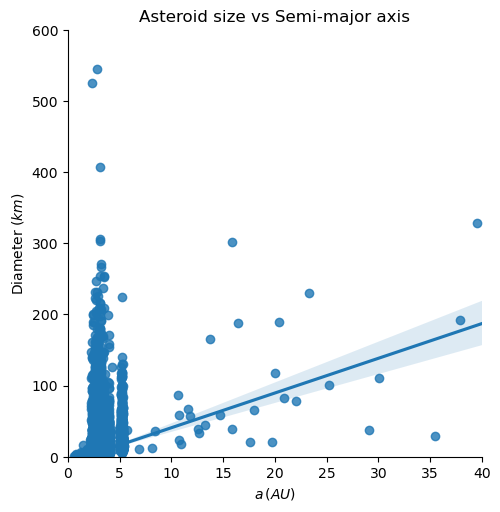

In [24]:
plt.figure(figsize = (10, 8))
sns.lmplot(data = df_sizes, x = "a", y = "diameter")
plt.xlim(0, 40)
plt.ylim(0, 600)
plt.xlabel(r"$a\,(AU)$")
plt.ylabel(r"Diameter $(km)$")
plt.title("Asteroid size vs Semi-major axis")
plt.show()

<Figure size 1000x700 with 0 Axes>

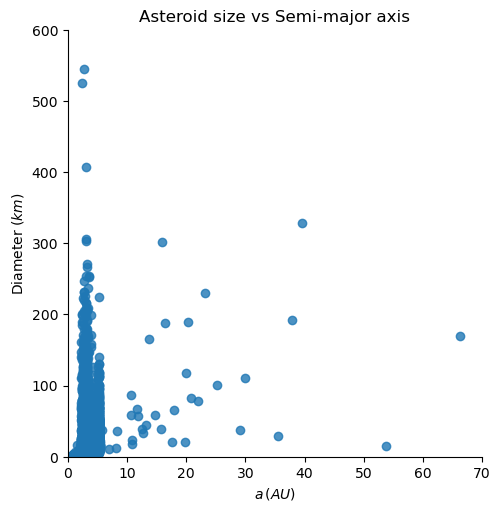

In [25]:
plt.figure(figsize = (10, 7))
sns.lmplot(data = df_sizes, x = "a", y = "diameter", fit_reg = False)
plt.xlim(0, 70)
plt.ylim(0, 600)
plt.xlabel(r"$a\,(AU)$")
plt.ylabel(r"Diameter $(km)$")
plt.title("Asteroid size vs Semi-major axis")
plt.show()

Little insight can be obtained from this two plots. The relation between semi-major axis $a$ and size seems week.

Does this hold when considering asteroids by class instead?

- Is there a relation between the asteroid class and size? Is there a value where asteroid size has a peak?

Answering the second part of the question is easy: the biggest asteroids are located in the main belt, and those are **Palas** and **Vesta**.

#### **H2:**

- *Asteroids with higher eccentricity values have smaller diameters.*

A bigger eccentricity may increase the collision rate, which would make such asteroids more proun to collide with planets whose orbits are crossed by these asteroids.

First, let's check what the main features of the eccentricity of the asteroids are:

In [29]:
df_sizes["e"].describe()

count    126128.000000
mean          0.143555
std           0.073637
min           0.000309
25%           0.089398
50%           0.137779
75%           0.189101
max           0.968396
Name: e, dtype: float64

<Figure size 1000x700 with 0 Axes>

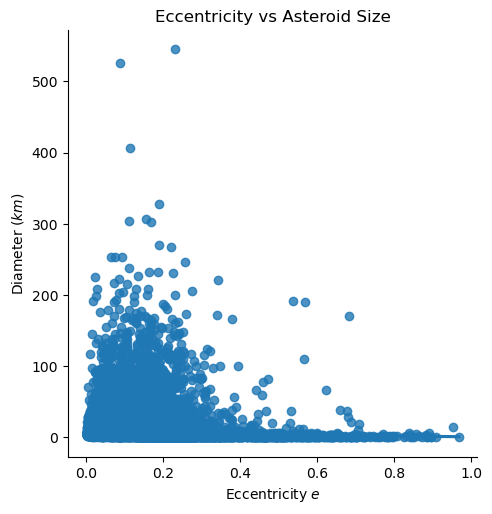

In [30]:
plt.figure(figsize = (10, 7))
sns.lmplot(data = df_sizes, x = "e", y = "diameter", fit_reg = True)
plt.title("Eccentricity vs Asteroid Size")
plt.xlabel(r"Eccentricity $e$")
plt.ylabel(r"Diameter $(km)$")
plt.show()

### 3.2 Orbits:

#### Q1:

- *Do larger semi-major axis values imply a larger eccentricity?*

Many comets that approach the inner Solar System originate in the Kuiper Belt and have large eccentricity values. Asteroids that orbit the Sun far away from it might also have a high $e$.

<Figure size 1000x700 with 0 Axes>

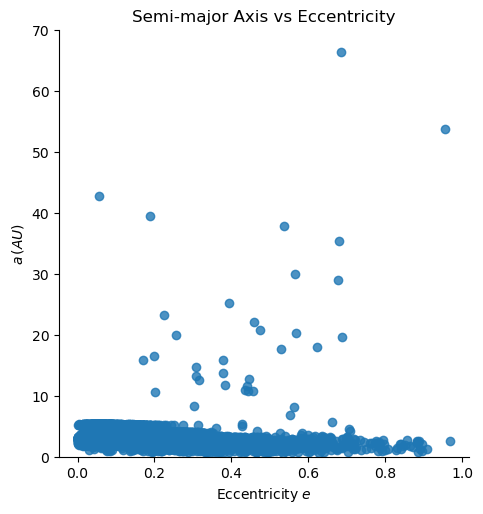

In [31]:
plt.figure(figsize = (10, 7))
sns.lmplot(data = df, y = "a", x = "e", fit_reg = False, )
plt.ylabel(r"$a\,(AU)$")
plt.xlabel("Eccentricity $e$")
plt.ylim(0, 70)
plt.title("Semi-major Axis vs Eccentricity")
plt.show()

In [ ]:
# CUIDADO AL EJECUTAR ESTA CELDA: TARDA UN HUEVO EN EJECUTARSE!
#plt.figure(figsize = (10, 7))
#sns.jointplot(data = df, y = "a", x = "e", kind = "kde")
#plt.ylabel(r"$a\,(AU)$")
#plt.xlabel("Eccentricity $e$")
#plt.ylim(0, 70)
##plt.title("Semi-major Axis vs Eccentricity")
#plt.show()

### 3.3 Brightness:

#### H1:

- *Asteroids far away from the Sun have larger albedo values.*

During the formation of the Solar System, when the Sun began to shine, it melted all the icy bodies "close" to it (below the what is called the *ice line*).

Usually, asteroids made out of ice substances (water, amonia, ...) shine, which gives them higher values of the albedo.

The thing is: do asteroids far away from the Sun have higher albedos and therefore have a bigger fraction of ice materials?

<Figure size 640x480 with 0 Axes>

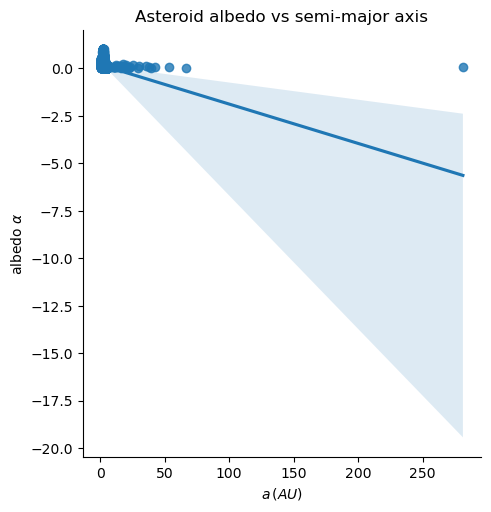

In [51]:
plt.figure()
sns.lmplot(data = df, x = "a", y = "albedo")
plt.xlabel(r"$a\,(AU)$")
plt.ylabel(r"albedo $\alpha$")
plt.title("Asteroid albedo vs semi-major axis")
plt.show()

<Figure size 640x480 with 0 Axes>

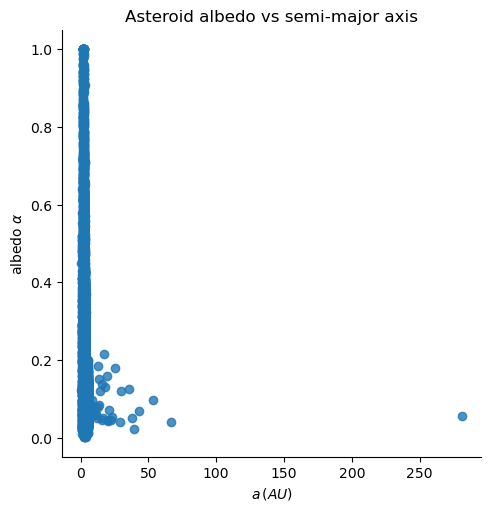

In [52]:
plt.figure()
sns.lmplot(data = df, x = "a", y = "albedo", fit_reg = False)
plt.xlabel(r"$a\,(AU)$")
plt.ylabel(r"albedo $\alpha$")
plt.title("Asteroid albedo vs semi-major axis")
plt.show()

In [53]:
df["albedo"].describe()

count    126131.000000
mean          0.134927
std           0.112425
min           0.001000
25%           0.054000
50%           0.081000
75%           0.200000
max           1.000000
Name: albedo, dtype: float64

In [58]:
df.sort_values(by = "albedo", ascending = False).head(10)

,spkid,full_name,pha,H,diameter,albedo,diameter_sigma,e,a,q,i,ad,per,per_y,class
15054,2018586,' 18586 (1997 YD3)',False,13.9,2.339,1.0,0.489,0.175485,2.472855,2.038905,6.491772,2.906805,1420.353272,3.888715,MBA
4544,2004868,' 4868 Knushevia (1989 UN2)',False,14.8,1.535,1.0,0.322,0.067925,1.960671,1.827492,22.103466,2.093849,1002.779372,2.745460,IMB
25257,2034063,' 34063 Mariamakarova (2000 OA49)',False,14.5,2.009,1.0,0.341,0.198295,2.323203,1.862523,5.152692,2.783883,1293.389152,3.541107,MBA
29045,2040203,' 40203 (1998 SP27)',False,15.4,1.249,1.0,0.185,0.103354,1.933870,1.733997,23.353366,2.133742,982.288890,2.689360,IMB
1995,2002048,' 2048 Dwornik (1973 QA)',False,13.4,2.613,1.0,0.140,0.042496,1.953378,1.870367,23.754334,2.036390,997.190211,2.730158,IMB
5168,2005579,' 5579 Uhlherr (1988 JL)',False,14.1,2.654,1.0,0.473,0.097595,1.949102,1.758878,23.545942,2.139325,993.917203,2.721197,IMB
4167,2004440,' 4440 Tchantches (1984 YV)',False,13.8,2.093,1.0,0.586,0.076906,1.921020,1.773282,21.352442,2.068759,972.515129,2.662601,IMB
1014,2001025,' 1025 Riema (1923 NX)',False,12.5,4.605,1.0,0.171,0.039157,1.979194,1.901695,26.862065,2.056692,1017.023097,2.784457,IMB
34278,2049675,' 49675 (1999 SW27)',False,14.6,1.896,1.0,0.257,0.089622,1.951691,1.776776,18.042296,2.126605,995.898010,2.726620,IMB
27541,2037634,' 37634 (1993 UZ)',False,15.5,1.651,1.0,0.413,0.090560,1.925855,1.751450,20.532759,2.100260,976.188843,2.672659,IMB


The dataset contains many asteroids with albedo values $\alpha = 1$. Is this trully realistic? Isn't it too large? Many asteroids can reach high values of albedo, but 1 seems too much. Havin $\alpha = 1$, means that the asteroid would reflect all the light it receives. This hypothesis needs a rework.

### 3.4 Asteroid Risk:

- *Asteroids classified as dangerous belong mostly to categories close to Earth (Apollo, Atena and Amor asteroids).*

We will be making a subset to select those asteroids that have the boolean variable **pha** set to `True`.

In [33]:
mask_danger = df["pha"] == True

In [34]:
df_danger = df[mask_danger]

In [37]:
df_danger.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1534 to 126009
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           156 non-null    int64  
 1   full_name       156 non-null    object 
 2   pha             156 non-null    bool   
 3   H               156 non-null    float64
 4   diameter        153 non-null    float64
 5   albedo          156 non-null    float64
 6   diameter_sigma  138 non-null    float64
 7   e               156 non-null    float64
 8   a               156 non-null    float64
 9   q               156 non-null    float64
 10  i               156 non-null    float64
 11  ad              156 non-null    float64
 12  per             156 non-null    float64
 13  per_y           156 non-null    float64
 14  class           156 non-null    object 
dtypes: bool(1), float64(11), int64(1), object(2)
memory usage: 18.4+ KB


There are 156 asteroids classified as dangerous. Let's check whether most of them belong to classes close to Earth.

In [38]:
df_danger["class"].value_counts()

class
APO    123
ATE     27
AMO      6
Name: count, dtype: int64

**All** the asteroids classified as dangerous belong to the **Apollo**, **Atena** and **Amor** classes! That is surprising but also good news: the closest asteroids to us are the ones that are dangerous. That makes detecting them easier!

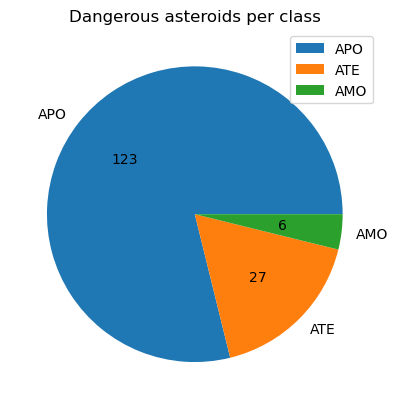

In [48]:
labels_danger = df_danger["class"].value_counts().index
counts = df_danger["class"].value_counts()

plt.figure()
plt.pie(df_danger["class"].value_counts(), labels = labels_danger,
       autopct=lambda p: f'{int(p * sum(counts) / 100)}')
plt.title("Dangerous asteroids per class")
plt.legend(loc = "upper right")
plt.show()

In [49]:
df["class"].value_counts()

class
MBA    116129
OMB      6871
TJN      1831
IMB       445
APO       291
MCA       264
AMO       190
ATE        69
CEN        29
TNO         7
AST         5
Name: count, dtype: int64

This is really interesting to see. The greatest amount of dangerous asteroids is found in the **Apollo** class, those asteroids that **don't cross Earth's orbit!**

Also, the fraction of **Apollo** class asteroids that pose a threat to Earth is higher than in the **Atena** and **Amor** classes.